# CSIT 553 Homework 3 
## [Name]:

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

c:\users\ben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  # This is added back by InteractiveShellApp.init_path()
c:\users\ben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  if sys.path[0] == "":


## About the Data Set: Chicago Food Inspections
Link: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP). For descriptions of the data elements included in this set, go to http://bit.ly/tS9IE8

Note about 7/1/2018 change to food inspection procedures that affects the data in this dataset: http://bit.ly/2yWd2JB

Disclaimer: Attempts have been made to minimize any and all duplicate inspection reports. However, the dataset may still contain such duplicates and the appropriate precautions should be exercised when viewing or analyzing these data. The result of the inspections (pass, pass with conditions or fail) as well as the violations noted are based on the findings identified and reported by the inspector at the time of the inspection, and may not reflect the findings noted at other times. For more information about Food Inspections, go to https://www.cityofchicago.org/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html.

Columns in this Dataset

| Column Name     | Description       | Type       |
|-----------------|-------------------|------------|
| Inspection ID   |                   | Number     |
| DBA Name        | Doing Business As | Plain Text |
| AKA Name        | Also Known As     | Plain Text |
| License #       |                   | Number     |
| Facility Type   |                   | Plain Text |
| Risk            |                   | Plain Text |
| Address         |                   | Plain Text |
| City            |                   | Plain Text |
| State           |                   | Plain Text |
| Zip             |                   | Number     |
| Inspection Date |                   | Date&Time  |
| Results         |                   | Plain Text |
| Violations      |                   | Plain Text |
| Latitude        |                   | Number     |
| Longitude       |                   | Number     |
| Location        |                   | Location   |

## Question 0. Data Preparation

### Load the data

In [3]:
df = pd.read_csv('C:/Users/ben/Downloads/hw3/hw3/Food_Inspections.csv')

In [4]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2500341,OAZAS,OAZAS,2476381.0,Restaurant,Risk 1 (High),3057 W LAWRENCE AVE,CHICAGO,IL,60625.0,04/16/2021,Non-Inspection,No Entry,NaN,41.968367,-87.705891,"(-87.70589093652268, 41.96836672599028)"
1,2484567,ROYALTY,ROYALTY,1306130.0,Restaurant,Risk 1 (High),3810 W 63RD ST,CHICAGO,IL,60629.0,02/05/2021,Non-Inspection,No Entry,NaN,41.778837,-87.718361,"(-87.71836138998039, 41.778836516734856)"
2,2473041,ROSATI'S GRANT PARK,ROSATI'S,2762683.0,Restaurant,Risk 1 (High),23 E ADAMS ST,CHICAGO,IL,60603.0,01/22/2021,License,Pass,NaN,41.879391,-87.626848,"(-87.62684825563626, 41.879391313239694)"
3,2463977,HWA WON,HWA WON,2341742.0,Restaurant,Risk 1 (High),2519 W PETERSON AVE,CHICAGO,IL,60659.0,12/21/2020,Non-Inspection,No Entry,NaN,41.990368,-87.692981,"(-87.6929808527407, 41.99036795715765)"
4,2463877,NO.7,NO.7,2560610.0,Restaurant,Risk 1 (High),2485 N CLARK ST,CHICAGO,IL,60614.0,12/16/2020,Canvass,Out of Business,NaN,41.927834,-87.641659,"(-87.6416588091054, 41.92783381766517)"


In [5]:
df.Results.unique()

array(['No Entry', 'Pass', 'Out of Business', 'Not Ready', 'Fail',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

### Extract the columns of inspection date and inspection results

In [6]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

In [7]:
results = df[['Inspection Date','Results']]

In [8]:
results.set_index('Inspection Date',inplace=True)

In [9]:
results.head()

,Results
Inspection Date,
2021-04-16,No Entry
2021-02-05,No Entry
2021-01-22,Pass
2020-12-21,No Entry
2020-12-16,Out of Business


### Count the number of different results in the inspection
1. Create a dataframe **diff_results** from **results** and set the columns by different inspection results. 
2. All the missing data are set as 0.
3. Combine the columns **Business Not Located**, **No Entry**, **Not Ready**, **Out of Business** into one column **Not Inspected**.

In [10]:
diff_results = results.pivot_table(index='Inspection Date',columns='Results',aggfunc=len)
diff_results = diff_results.replace(np.nan,0)

In [11]:
diff_results['Not Inspected']=diff_results[['Business Not Located','No Entry','Not Ready','Out of Business']].sum(axis=1)
col =['Pass','Pass w/ Conditions','Fail','Not Inspected']
diff_results = diff_results[col]

In [12]:
diff_results

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
2010-01-04,5.0,0.0,2.0,0.0
2010-01-05,48.0,3.0,20.0,0.0
2010-01-06,50.0,5.0,26.0,0.0
2010-01-07,41.0,3.0,18.0,0.0
2010-01-08,32.0,3.0,8.0,0.0
...,...,...,...,...
2021-04-23,12.0,6.0,4.0,2.0
2021-04-26,16.0,7.0,3.0,10.0
2021-04-27,13.0,4.0,9.0,2.0


### Get different inspection results in 2020

In [13]:
year_2020 = diff_results[diff_results.index.year == 2020]

In [14]:
year_2020

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
2020-01-02,6.0,7.0,7.0,5.0
2020-01-03,17.0,30.0,17.0,11.0
2020-01-06,1.0,4.0,2.0,2.0
2020-01-07,27.0,40.0,16.0,20.0
2020-01-08,35.0,25.0,24.0,13.0
...,...,...,...,...
2020-12-24,9.0,6.0,3.0,9.0
2020-12-28,11.0,3.0,6.0,7.0
2020-12-29,11.0,6.0,4.0,8.0


### Get different monthly inspection results in 2020
Creat a dataframe **year_2020_byMonth** to indicate the number inspection of each month in 2020

In [15]:
year_2020_byMonth = year_2020.groupby(by=year_2020.index.month).sum()
year_2020_byMonth

Results,Pass,Pass w/ Conditions,Fail,Not Inspected
Inspection Date,,,,
1,664.0,488.0,363.0,209.0
2,528.0,351.0,285.0,164.0
3,533.0,464.0,292.0,292.0
4,338.0,454.0,250.0,243.0
5,390.0,410.0,271.0,228.0
...,...,...,...,...
8,438.0,255.0,199.0,160.0
9,589.0,265.0,224.0,159.0
10,554.0,204.0,243.0,197.0


## Question 1[10 points]. Line plot to show total inspection numbers over years
Draw a line plot to show the total inspections of every month from Jan. 2000 to April 2021.

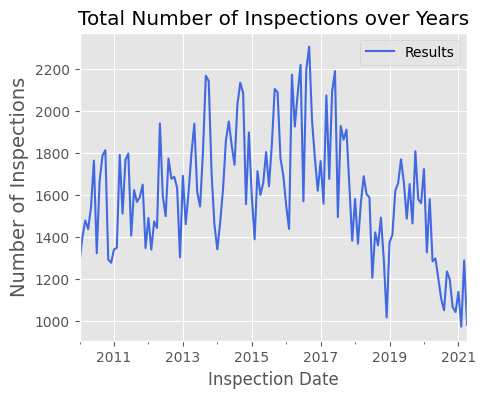

In [44]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(5,4))
diff_results.resample('M').sum().sum(axis=1).plot(ax=ax, color="royalblue")
ax.set_title('Total Number of Inspections over Years')
ax.set_xlabel('Inspection Date')
ax.set_ylabel('Number of Inspections', fontsize=14)
ax.legend(labels=['Results'])
plt.show()

Text(0, 0.5, 'Number of inspection')

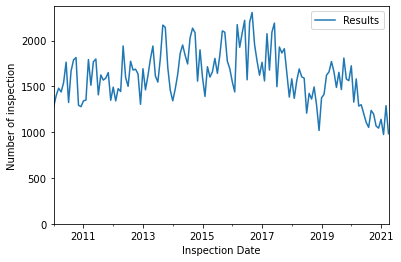

In [351]:
# Sample visualization

## Question 2 [10 points] Bar plot for the inspection number in 2020

Draw a bar plot to show the number of different inspection results. 

The visualization should show different inspection results along the a-axis in 2020 and a bar showing the total number of inspections of each result type. 


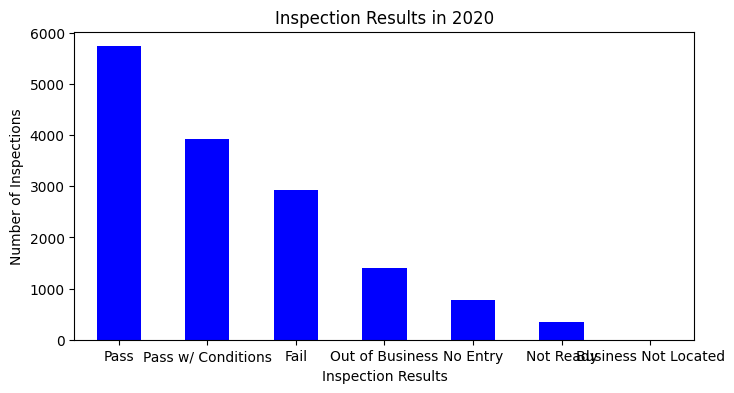

In [30]:
# Create a bar plot of the number of inspections for each result type in 2020

# Create a new dataframe with only inspection results from 2020
results_2020 = results[results.index.year == 2020]

# Get the count of different inspection results in 2020
results_2020_count = results_2020['Results'].value_counts()

# Create a bar plot to show the number of inspections and different inspection results in 2020
ax = results_2020_count.plot.bar(x='Results', y='Count', rot=0, color='blue', figsize=(8, 4))
ax.set_title('Inspection Results in 2020')
ax.set_xlabel('Inspection Results')
ax.set_ylabel('Number of Inspections')
plt.show()

Text(0, 0.5, 'Number of Inspection')

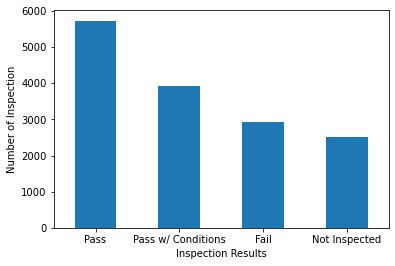

In [369]:
# Sample visualization

## Question 3 [15 points]Stacked bar plot for different inspection results in 2020
Draw a stacked bar plot to show the number of inspections. 

1. The visualization should show each month along the a-axis in 2020 and a bar showing the total number of attempted inspections of each month. 
2. The bar are split into different segaments by inspection results. 
3. A legend is created to describe the map from colors to results.

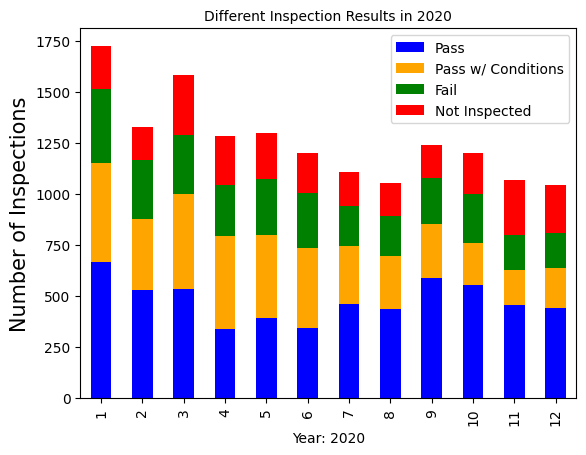

In [42]:
# plot the stacked bar plot
ax = year_2020_byMonth.plot(kind='bar',stacked=True,color=['blue','orange','green','red'])

# set the title and x,y labels
ax.set_title('Different Inspection Results in 2020', fontsize=10)
ax.set_xlabel('Year: 2020', fontsize=10)
ax.set_ylabel('Number of Inspections', fontsize=15)

# set the x ticks
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])

# add the legend
ax.legend(['Pass','Pass w/ Conditions','Fail','Not Inspected'])

# show the plot
plt.show()

Text(0, 0.5, 'Number of Inspection')

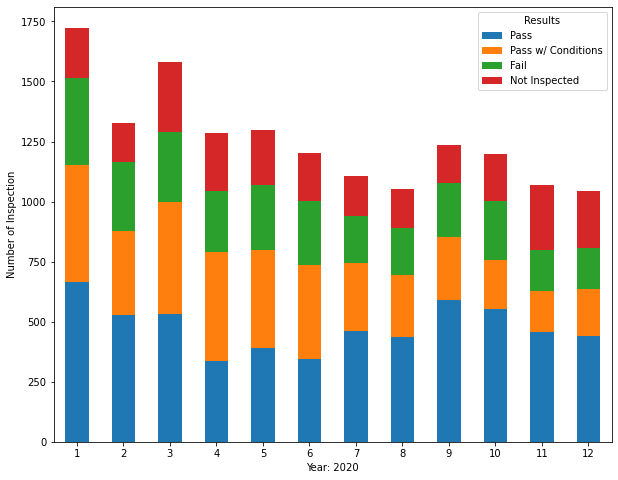

In [355]:
# Sample visualization


## Question 4 [15 points] Tell story using data visualization
Given this data set, what observation do you want to explore? What question do you want to answer?

Except the bar plot and the line plot, select one idiom we discussed in class for visualizing the tabular data set to express one observation or answer to your question. 

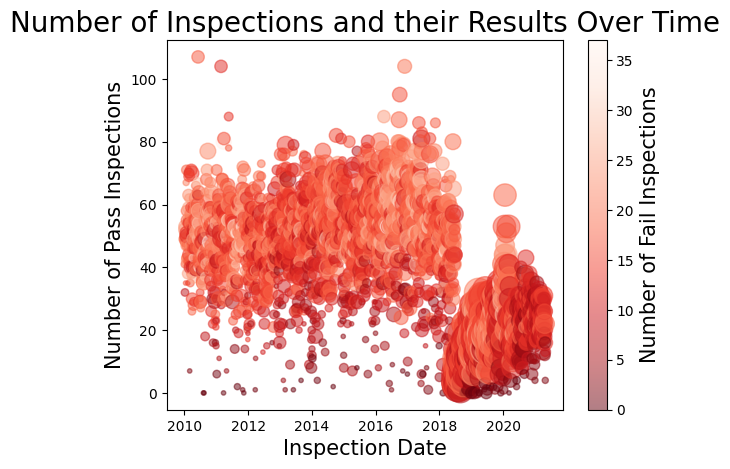

In [45]:
# I would like to explore the relationship between the number of inspections and the results of the inspections.
# Specifically, I want to answer the question: How has the number of inspections and their results changed over time?

# To answer this question, I will use a scatterplot to visualize the data. 
# The scatterplot will allow me to view the changes in the number of inspections and the results of the inspections over time.
#This visualization will reveal any correlations or patterns between the two variables.


# plot the scatterplot
ax = plt.scatter(x=diff_results.index, y=diff_results['Pass'], s=diff_results['Pass w/ Conditions']*10, 
            c=diff_results['Fail'], alpha=0.5, cmap='Reds_r')

# set the title and x,y labels
plt.title('Number of Inspections and their Results Over Time', fontsize=20)
plt.xlabel('Inspection Date', fontsize=15)
plt.ylabel('Number of Pass Inspections', fontsize=15)

# add the colorbar
cbar = plt.colorbar(ax)
cbar.set_label('Number of Fail Inspections', fontsize=15)

# show the plot
plt.show()